## 載入資料

In [62]:
import pandas as pd

df = pd.read_csv("./titanic_data.csv")
df.shape

(1309, 11)

In [63]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,Allen Miss. Elisabeth Walton,female,29.0000,0,0,24160,211.3375,B5,S
1,1,1,Allison Master. Hudson Trevor,male,0.9167,1,2,113781,151.5500,C22 C26,S
2,1,0,Allison Miss. Helen Loraine,female,2.0000,1,2,113781,151.5500,C22 C26,S
3,1,0,Allison Mr. Hudson Joshua Creighton,male,30.0000,1,2,113781,151.5500,C22 C26,S
4,1,0,Allison Mrs. Hudson J C (Bessie Waldo Daniels),female,25.0000,1,2,113781,151.5500,C22 C26,S


In [64]:
df.describe()

,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


## 缺任資料有無缺失值 

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   cabin     295 non-null    object 
 10  embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [66]:
df.isnull().sum()

pclass         0
survived       0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
dtype: int64

上述資訊可以看出 age、fare、cabin、embarked 欄位都有遺漏值

## EDA

* 刪除不要的欄位 

name、ticket、cabin欄位不是特徵資料，把這些欄位刪除

In [67]:
df.drop(["name", "ticket", "cabin"],axis= 1, inplace = True)
df

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,1,0,female,2.0000,1,2,151.5500,S
3,1,0,male,30.0000,1,2,151.5500,S
4,1,0,female,25.0000,1,2,151.5500,S
...,...,...,...,...,...,...,...,...
1304,3,0,female,14.5000,1,0,14.4542,C
1305,3,0,female,NaN,1,0,14.4542,C
1306,3,0,male,26.5000,0,0,7.2250,C
1307,3,0,male,27.0000,0,0,7.2250,C


* 處理遺失資料

age(有263筆)和 fare(有1筆)欄位，填入平均值

In [68]:
df["age"] = df["age"].fillna(df["age"].mean())
df["fare"] = df["fare"].fillna(df["fare"].mean())


embarked缺失值填入最大值 S

In [69]:
df["embarked"].value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [70]:
df["embarked"] = df["embarked"].fillna(df["embarked"].value_counts().idxmax())

In [71]:
df["embarked"].value_counts()

S    916
C    270
Q    123
Name: embarked, dtype: int64

#### 轉換非數值資料

將 sex 及 embarked 轉換成數值資料

In [72]:
df["sex"] = df["sex"].map({"male":0, "female":1}).astype(int)

In [73]:
embarked_one_hot = pd.get_dummies(df["embarked"], prefix = "embarked")
df = pd.concat([df,embarked_one_hot], axis=1)
df = df.drop("embarked", axis=1)


In [74]:
df

,pclass,survived,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S
0,1,1,1,29.000000,0,0,211.3375,0,0,1
1,1,1,0,0.916700,1,2,151.5500,0,0,1
2,1,0,1,2.000000,1,2,151.5500,0,0,1
3,1,0,0,30.000000,1,2,151.5500,0,0,1
4,1,0,1,25.000000,1,2,151.5500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1304,3,0,1,14.500000,1,0,14.4542,1,0,0
1305,3,0,1,29.881135,1,0,14.4542,1,0,0
1306,3,0,0,26.500000,0,0,7.2250,1,0,0
1307,3,0,0,27.000000,0,0,7.2250,1,0,0


In [75]:
df_survived = df.pop("survived")
df["survived"] = df_survived
df

,pclass,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S,survived
0,1,1,29.000000,0,0,211.3375,0,0,1,1
1,1,0,0.916700,1,2,151.5500,0,0,1,1
2,1,1,2.000000,1,2,151.5500,0,0,1,0
3,1,0,30.000000,1,2,151.5500,0,0,1,0
4,1,1,25.000000,1,2,151.5500,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1304,3,1,14.500000,1,0,14.4542,1,0,0,0
1305,3,1,29.881135,1,0,14.4542,1,0,0,0
1306,3,0,26.500000,0,0,7.2250,1,0,0,0
1307,3,0,27.000000,0,0,7.2250,1,0,0,0


## 將資料分隔成訓練及與測試集

In [78]:
import numpy as np
mask = np.random.rand(len(df)) < 0.8
df_train = df[mask]
df_test = df[~mask]
print(f"Train : {df_train.shape}")
print(f"Test : {df_test.shape}")

Train : (1042, 10)
Test : (267, 10)


## 生存分析

資料處理

In [102]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

dataset_train = df_train.values
dataset_test = df_test.values

X_train = dataset_train[:, :9]
Y_train = dataset_train[:, 9]
X_test = dataset_test[:, :9]
Y_test = dataset_test[:, 9]

#資料標準化
X_train -= X_train.mean(axis=0)
X_train /= X_train.std(axis=0)
X_test -= X_test.mean(axis=0)
X_test /= X_test.std(axis=0)

# 定義模型
model = Sequential()
model.add(Dense(11, input_dim = X_train.shape[1], activation = "relu"))
model.add(Dense(11, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 11)                110       
_________________________________________________________________
dense_10 (Dense)             (None, 11)                132       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 12        
Total params: 254
Trainable params: 254
Non-trainable params: 0
_________________________________________________________________


In [103]:
# 編譯模型
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# 訓練模型
history = model.fit(X_train, Y_train, validation_split = 0.2, epochs=100, batch_size= 10)

#評估模型
loss, accuracy = model.evaluate(X_train, Y_train)
print(f"訓練資料的準確度 : {accuracy}")
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"測試資料的準確度 : {accuracy}")


Epoch 1/100
84/84 [==============================] - 1s 4ms/step - loss: 0.6771 - accuracy: 0.5954 - val_loss: 0.6165 - val_accuracy: 0.7656
Epoch 2/100
84/84 [==============================] - 0s 1ms/step - loss: 0.6220 - accuracy: 0.6747 - val_loss: 0.5687 - val_accuracy: 0.7990
Epoch 3/100
84/84 [==============================] - 0s 1ms/step - loss: 0.5747 - accuracy: 0.7755 - val_loss: 0.5233 - val_accuracy: 0.7464
Epoch 4/100
84/84 [==============================] - 0s 1ms/step - loss: 0.5303 - accuracy: 0.7743 - val_loss: 0.5098 - val_accuracy: 0.7512
Epoch 5/100
84/84 [==============================] - 0s 1ms/step - loss: 0.5013 - accuracy: 0.7779 - val_loss: 0.5010 - val_accuracy: 0.7512
Epoch 6/100
84/84 [==============================] - 0s 1ms/step - loss: 0.4832 - accuracy: 0.7791 - val_loss: 0.4864 - val_accuracy: 0.7703
Epoch 7/100
84/84 [==============================] - 0s 1ms/step - loss: 0.4711 - accuracy: 0.7815 - val_loss: 0.4753 - val_accuracy: 0.7703
Epoch 8/100
8

Epoch 59/100
84/84 [==============================] - 0s 1ms/step - loss: 0.4039 - accuracy: 0.8295 - val_loss: 0.4450 - val_accuracy: 0.7990
Epoch 60/100
84/84 [==============================] - 0s 1ms/step - loss: 0.4039 - accuracy: 0.8283 - val_loss: 0.4436 - val_accuracy: 0.7990
Epoch 61/100
84/84 [==============================] - 0s 1ms/step - loss: 0.4039 - accuracy: 0.8247 - val_loss: 0.4479 - val_accuracy: 0.7751
Epoch 62/100
84/84 [==============================] - 0s 1ms/step - loss: 0.4020 - accuracy: 0.8283 - val_loss: 0.4437 - val_accuracy: 0.7895
Epoch 63/100
84/84 [==============================] - 0s 1ms/step - loss: 0.4027 - accuracy: 0.8295 - val_loss: 0.4423 - val_accuracy: 0.7751
Epoch 64/100
84/84 [==============================] - 0s 1ms/step - loss: 0.4024 - accuracy: 0.8211 - val_loss: 0.4499 - val_accuracy: 0.8086
Epoch 65/100
84/84 [==============================] - 0s 1ms/step - loss: 0.4007 - accuracy: 0.8319 - val_loss: 0.4506 - val_accuracy: 0.7895
Epoch 

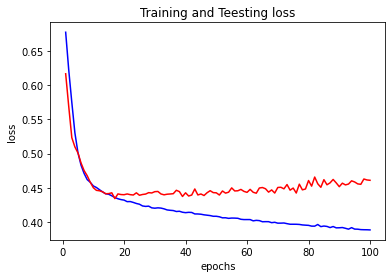

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]

plt.plot(epochs, loss, "b-", label = "Training loss")
plt.plot(epochs, val_loss, "r-", label = "Testing loss")
plt.title("Training and Teesting loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

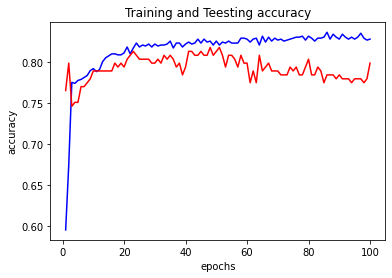

In [106]:
acc = history.history["accuracy"]
epochs = range(1, len(loss)+1)
val_acc = history.history["val_accuracy"]

plt.plot(epochs, acc, "b-", label = "Training accuracy")
plt.plot(epochs, val_acc, "r-", label = "Testing accuracy")
plt.title("Training and Teesting accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

由上述圖表可以看到，訓練週期約 18 次後，之後再訓練多次指毀產生過度擬合

所以後續我們以 epochs=18 將全部的訓練資料帶入模型做預測

In [112]:
dataset_train = df_train.values
dataset_test = df_test.values

X_train = dataset_train[:, :9]
Y_train = dataset_train[:, 9]
X_test = dataset_test[:, :9]
Y_test = dataset_test[:, 9]

# 資料標準化
X_train -= X_train.mean(axis=0)
X_train /= X_train.std(axis=0)
X_test -= X_test.mean(axis=0)
X_test /= X_test.std(axis=0)

# 定義模型
model = Sequential()
model.add(Dense(11, input_dim = X_train.shape[1], activation = "relu"))
model.add(Dense(11, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
model.summary()

# 編譯模型
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# 訓練模型，全部資料帶入，且 epochs 次數改成18
history = model.fit(X_train, Y_train, epochs=18, batch_size= 10, verbose = 0)

#評估模型
loss, accuracy = model.evaluate(X_train, Y_train)
print(f"訓練資料的準確度 : {accuracy}")
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"測試資料的準確度 : {accuracy}")

Y_pred = model.predict_classes(X_test)
tb = pd.crosstab(Y_test, Y_pred[:,0], rownames = ["label"], colnames = ["predict"])
tb

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 11)                110       
_________________________________________________________________
dense_28 (Dense)             (None, 11)                132       
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 12        
Total params: 254
Trainable params: 254
Non-trainable params: 0
_________________________________________________________________
33/33 [==============================] - 0s 776us/step - loss: 0.4146 - accuracy: 0.8273
訓練資料的準確度 : 0.8272552490234375
9/9 [==============================] - 0s 873us/step - loss: 0.4401 - accuracy: 0.8090
測試資料的準確度 : 0.8089887499809265


C:\Users\user\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


predict,0,1
label,,
0.0,151,16
1.0,35,65


由結果可以看見，此模型正確預測死亡機率為 151/167 =0.9042，預測生存正確機率為 65/100 = 0.65